<a href="https://colab.research.google.com/github/petersonrs/petersonrs/blob/main/Livro_ANALISE_PRATICA_SERIES_TEMPORAIS_Cap14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#1º Passo
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? Y
y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [8]:
#Período
inicio = '2021-01-01'
fim = '2023-12-30'

#Seleção dos ativos da carteira
ativos = ['RAIZ4.SA']

In [9]:
#montar carteira

carteira = yf.download(tickers=ativos, start=inicio, end=fim)

[*********************100%***********************]  1 of 1 completed


In [10]:
import matplotlib as plt

In [11]:
carteira

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-05,7.48,7.60,7.18,7.24,6.711554,98849900
2021-08-06,7.25,7.35,7.03,7.10,6.581773,28799900
2021-08-09,7.18,7.31,7.07,7.07,6.553963,14491100
2021-08-10,7.12,7.16,7.05,7.10,6.581773,9988600
2021-08-11,7.13,7.14,6.80,6.87,6.368560,31978000
...,...,...,...,...,...,...
2023-05-02,3.18,3.24,3.04,3.04,3.040000,14598900
2023-05-03,3.06,3.19,3.00,3.15,3.150000,15681500
2023-05-04,3.17,3.22,3.11,3.18,3.180000,20441800


<Axes: xlabel='Date'>

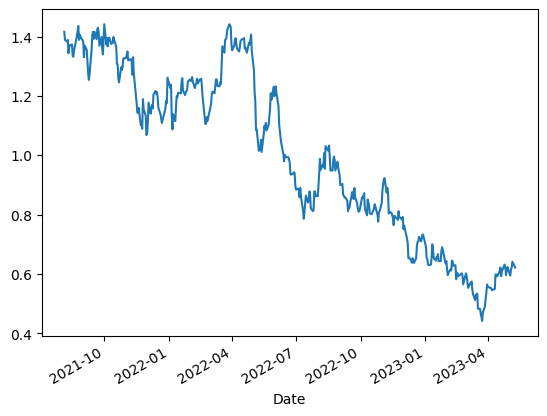

In [12]:

close = carteira.Close.values
media_close = np.mean(close)

carteira['media'] = (close / media_close)
carteira.media.plot()

<Axes: xlabel='Date'>

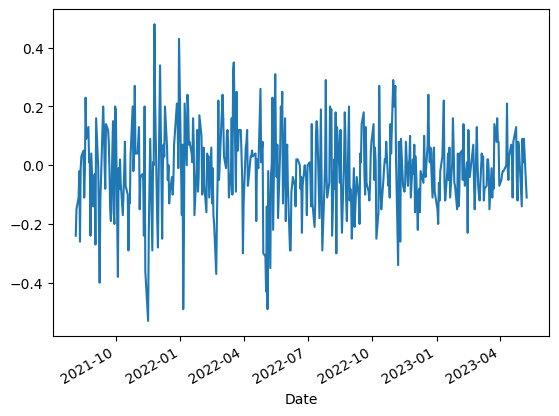

In [13]:
#cálculo do retorno diário
carteira['retorno_diario'] = carteira.Close - carteira.Open	
carteira.retorno_diario.plot()

<Axes: xlabel='Date'>

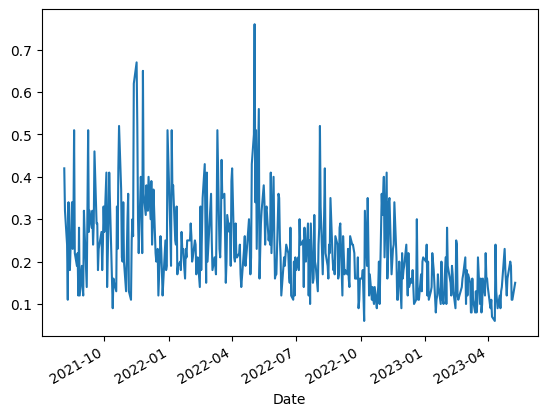

In [14]:
#volatilidade diaria 
carteira['volatilidade'] = carteira.High - carteira.Low
carteira['volatilidade'].plot()

In [16]:
ewdf = carteira.ewm(halflife=10, adjust=True).mean()
ewdf

,Open,High,Low,Close,Adj Close,Volume,media,retorno_diario,volatilidade
Date,,,,,,,,,
2021-08-05,7.480000,7.600000,7.180000,7.240000,6.711554,9.884990e+07,1.416379,-0.240000,0.420000
2021-08-06,7.361016,7.470669,7.102402,7.167575,6.644415,6.261151e+07,1.402211,-0.193441,0.368268
2021-08-09,7.296450,7.413361,7.090845,7.132771,6.612152,4.544762e+07,1.395402,-0.163679,0.322516
2021-08-10,7.247651,7.343291,7.079549,7.123708,6.603751,3.564103e+07,1.393629,-0.123943,0.263742
2021-08-11,7.220751,7.296811,7.015633,7.065700,6.549977,3.480351e+07,1.382281,-0.155051,0.281178
...,...,...,...,...,...,...,...,...,...
2023-05-02,2.982009,3.055126,2.913219,2.983071,2.970862,2.216367e+07,0.583586,0.001062,0.141907
2023-05-03,2.987232,3.064158,2.919030,2.994250,2.982859,2.172958e+07,0.585773,0.007018,0.145128
2023-05-04,2.999472,3.074594,2.931819,3.006689,2.996061,2.164334e+07,0.588206,0.007217,0.142775


In [18]:
# calcula a variância móvel exponencialmente ponderada
vewdf = carteira.ewm(halflife = 10).var()
vewdf

,Open,High,Low,Close,Adj Close,Volume,media,retorno_diario,volatilidade
Date,,,,,,,,,
2021-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-06,0.026450,0.031250,0.011250,0.009800,0.008422,2.453501e+15,0.000375,0.004050,0.005000
2021-08-09,0.024063,0.023983,0.005792,0.008012,0.006885,1.982530e+15,0.000307,0.004355,0.008085
2021-08-10,0.023802,0.032587,0.004172,0.005442,0.004676,1.611477e+15,0.000208,0.008320,0.017274
2021-08-11,0.020278,0.032708,0.020288,0.018161,0.015607,1.168770e+15,0.000695,0.010110,0.013781
...,...,...,...,...,...,...,...,...,...
2023-05-02,0.056904,0.058911,0.052786,0.055760,0.056476,2.860978e+14,0.002134,0.008606,0.002239
2023-05-03,0.053487,0.056144,0.049738,0.053830,0.054771,2.696583e+14,0.002060,0.008541,0.002239
2023-05-04,0.052067,0.053956,0.048768,0.052458,0.053619,2.517074e+14,0.002008,0.007970,0.002169


<Axes: xlabel='Date'>

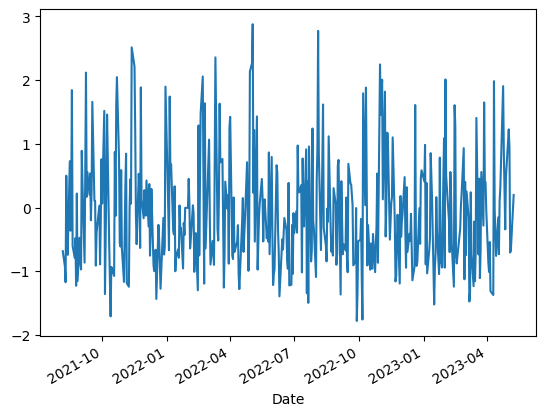

In [19]:
# escalona penalizando e normalizando
scaled = carteira.volatilidade - ewdf.volatilidade
scaled = scaled / vewdf.volatilidade**0.5
scaled.plot()